## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:]
X = X.drop(columns=['Occupation', 'No_of_Credits_at_this_Bank', 'Age_years', 'Guarantors', 'Foreign_Worker', 'No_of_dependents'], axis = 0)
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X.head())

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

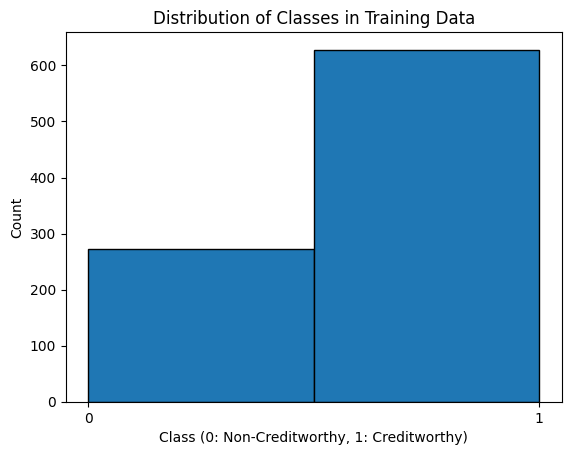

In [7]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [8]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.63
Accuracy: 0.75
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.62
Accuracy: 0.75
Precision: 0.78
Recall: 0.92


In [9]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.71
Accuracy: 0.76
Precision: 0.84
Recall: 0.82


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [2]:
Ход экспеременита:

1) Результаты при изначальных параметрах:
    - Random Forest ROC AUC: 0.68
    - Gradient Boosting ROC AUC: 0.67
    - MLP (Neural Network) ROC AUC: 0.56

2) Решил убрать из дата сета незначимые прикзнаки['Occupation', 'No_of_Credits_at_this_Bank', 'Age_years', 'Guarantors', 'Foreign_Worker'], показатели ROC-AUC увеличились:
    - Random Forest ROC AUC: 0.69
    - Gradient Boosting ROC AUC: 0.68
    - MLP (Neural Network) ROC AUC: 0.65

3) Решил заменить predict() на predict_proba() для подготовки данных используемых при расчёте ROC-AUC. Так как ROC-AUC работает с вероятностями, возвращаемыми predict_proba(), показатели ROC-AUC увличились:
    - Random Forest ROC AUC: 0.77
    - Gradient Boosting ROC AUC: 0.76
    - MLP (Neural Network) ROC AUC: 0.71
    - Работа со случайным лесом:

После увеличения количества деревьев до 600 ROC-AUC увеличился:
Random Forest ROC AUC: 0.77

При установке максимального количества признаков в колчисевте 2 для разделения ROC-AUC увеличился:
Random Forest ROC AUC: 0.78
    
При установке максимальной глубины равной 2 ROC-AUC увеличился:
Random Forest ROC AUC: 0.80
    
Дал моделям больше данных для обучения - 9/10 всех данных, для тестов оставил 1/10 всех данных. Получили ROC-AUC > 80 у случайного леса:
Random Forest ROC AUC: 0.85
Gradient Boosting ROC AUC: 0.77
MLP (Neural Network) ROC AUC: 0.69
Решил вернуть признак 'Telephone' и удалил 'No_of_dependents':
Random Forest ROC AUC: 0.85
Gradient Boosting ROC AUC: 0.78
MLP (Neural Network) ROC AUC: 0.77
Работа с градиентным бустингом:

При утсановке скорости обучения равной 0.06, ROC-AUC увеличился:
Gradient Boosting ROC AUC: 0.79
Установив максимальную глубину деревьев равную 1, получили ROC-AUV > 80:
Gradient Boosting ROC AUC: 0.83
Работа с MLP:

Установив кол-во нейронов в каждом скрытом слое в количестве 20, получили ROC-AUV > 80:
MLP (Neural Network) ROC AUC: 0.81

SyntaxError: unmatched ')' (2175589579.py, line 3)

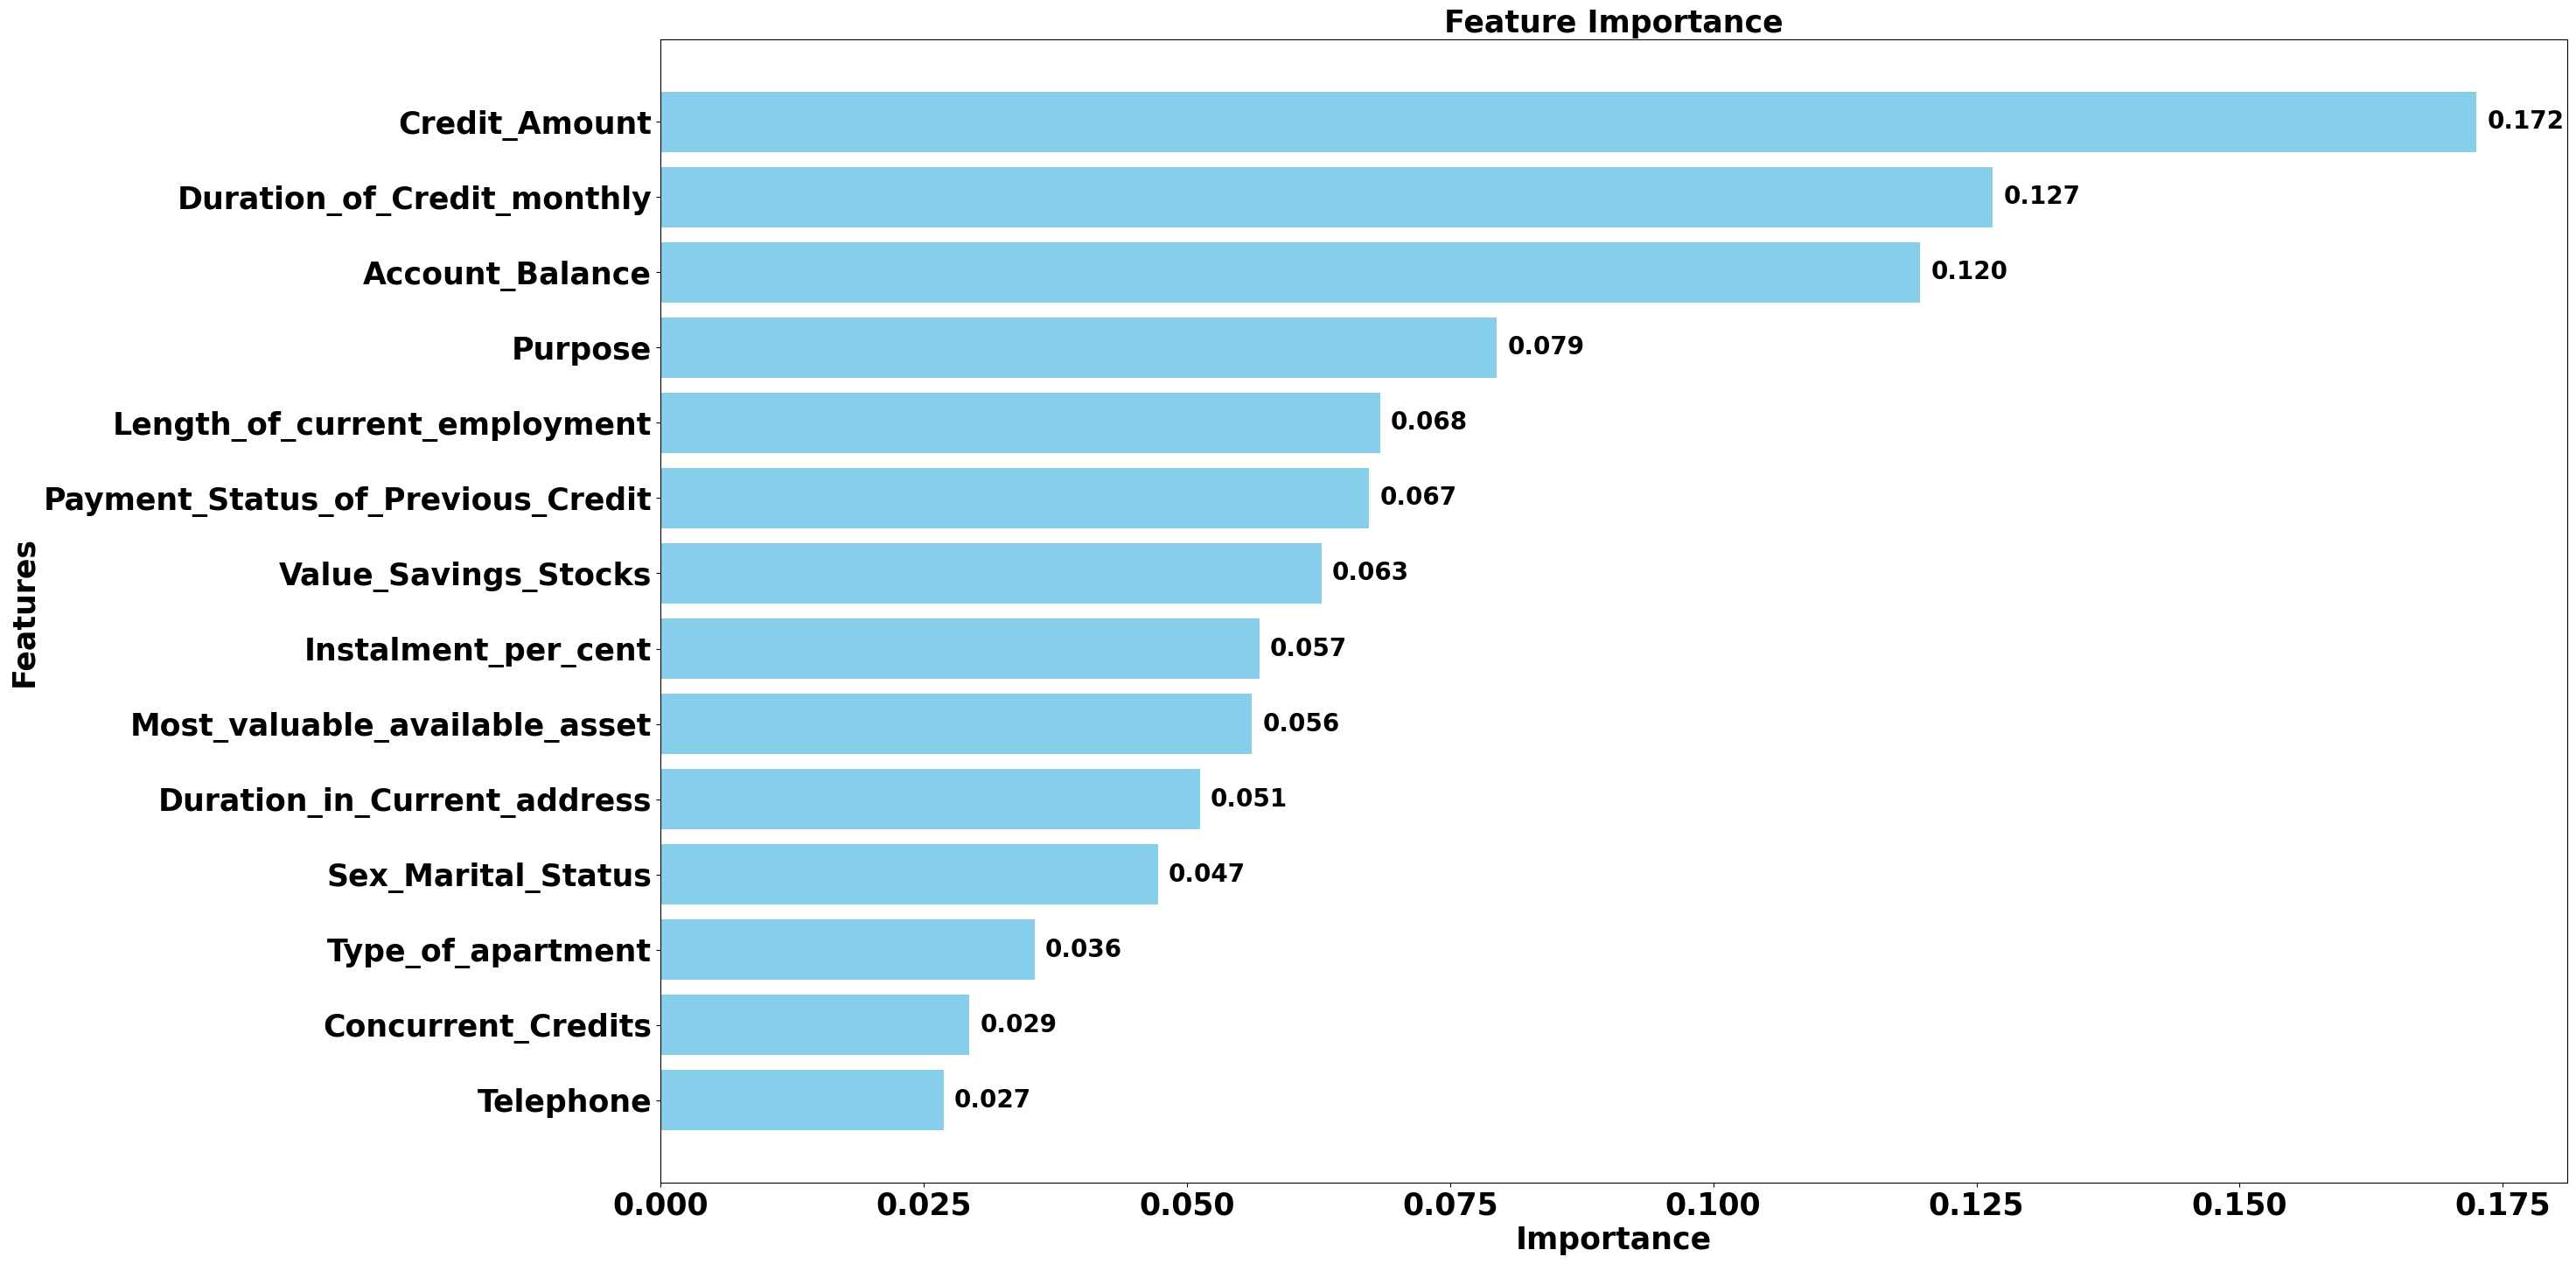

Random Forest метрики:
ROC AUC: 0.77
Accuracy: 0.75
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.83
Accuracy: 0.73
Precision: 0.74
Recall: 0.97


In [10]:
rrf_model = RandomForestClassifier(n_estimators=600, random_state=42, max_features=2, max_depth=2)
rf_model.fit(X_train, y_train)

# Вычисление важности признаков
feats = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

# Построение графика с использованием matplotlib
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 25, 'font.weight': 'bold'})

# Создание горизонтального bar plot
bars = plt.barh(importances['Features'], importances['Gini-Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Наиболее важные признаки вверху

plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

# Добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=20)

plt.tight_layout()
plt.show()

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, 
                                      learning_rate=0.06, max_depth=1)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

In [11]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(20), max_iter=600, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.81
Accuracy: 0.78
Precision: 0.87
Recall: 0.82
